In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import yfinance as yf

ms = yf.Ticker("MS")
jpm = yf.Ticker("JPM")
gs = yf.Ticker("GS")
hsbc = yf.Ticker("HSBC")

In [ ]:
ms

yfinance.Ticker object <MS>

In [ ]:
ms_hist = ms.history(period="10y")
jpm_hist = jpm.history(period="10y")
gs_hist = gs.history(period="10y")
hsbc_hist = hsbc.history(period="10y")

In [ ]:
ms_hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-11-28 00:00:00-05:00,26.720986,26.850624,26.720986,26.827747,3534700,0.0,0.0
2014-12-01 00:00:00-05:00,26.705745,26.850635,26.354956,26.766750,8802400,0.0,0.0
2014-12-02 00:00:00-05:00,26.850631,27.376816,26.850631,27.277679,9335200,0.0,0.0
2014-12-03 00:00:00-05:00,27.224295,27.872492,27.209043,27.849615,9147400,0.0,0.0
2014-12-04 00:00:00-05:00,27.834371,28.147030,27.628472,28.055521,9165300,0.0,0.0


In [ ]:
stock_list = [ms_hist,jpm_hist,gs_hist,hsbc_hist]
name_list = ['MS', 'JPM', 'GS','HSBC']

In [ ]:
for i,hist in enumerate(stock_list):
  print(f"sum of null values in {name_list[i]}: \n{hist.isna().sum()}")

sum of null values in MS: 
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64
sum of null values in JPM: 
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64
sum of null values in GS: 
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64
sum of null values in HSBC: 
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


In [ ]:
for i,hist in enumerate(stock_list):
  print(f"sum of duplicate values in {name_list[i]}: \n{hist.duplicated().sum()}")

sum of duplicate values in MS: 
0
sum of duplicate values in JPM: 
0
sum of duplicate values in GS: 
0
sum of duplicate values in HSBC: 
0


In [ ]:
for i,hist in enumerate(stock_list):
  print(f"Describe {name_list[i]}: \n{hist.describe()}")

Describe MS: 
              Open         High          Low        Close        Volume    Dividends  Stock Splits
count  2516.000000  2516.000000  2516.000000  2516.000000  2.516000e+03  2516.000000        2516.0
mean     54.132982    54.735352    53.543586    54.139807  1.024833e+07     0.007075           0.0
std      26.179408    26.449194    25.924372    26.187394  5.092474e+06     0.065258           0.0
min      16.881702    17.240058    16.484394    16.897284  2.087800e+06     0.000000           0.0
25%      34.105582    34.430245    33.689832    34.026782  6.922625e+06     0.000000           0.0
50%      42.322764    42.728316    41.987395    42.278183  8.987150e+06     0.000000           0.0
75%      79.818336    80.687279    78.971639    79.755791  1.209528e+07     0.000000           0.0
max     135.440002   136.240005   133.960007   134.990005  5.853350e+07     0.925000           0.0
Describe JPM: 
              Open         High          Low        Close        Volume    Divid

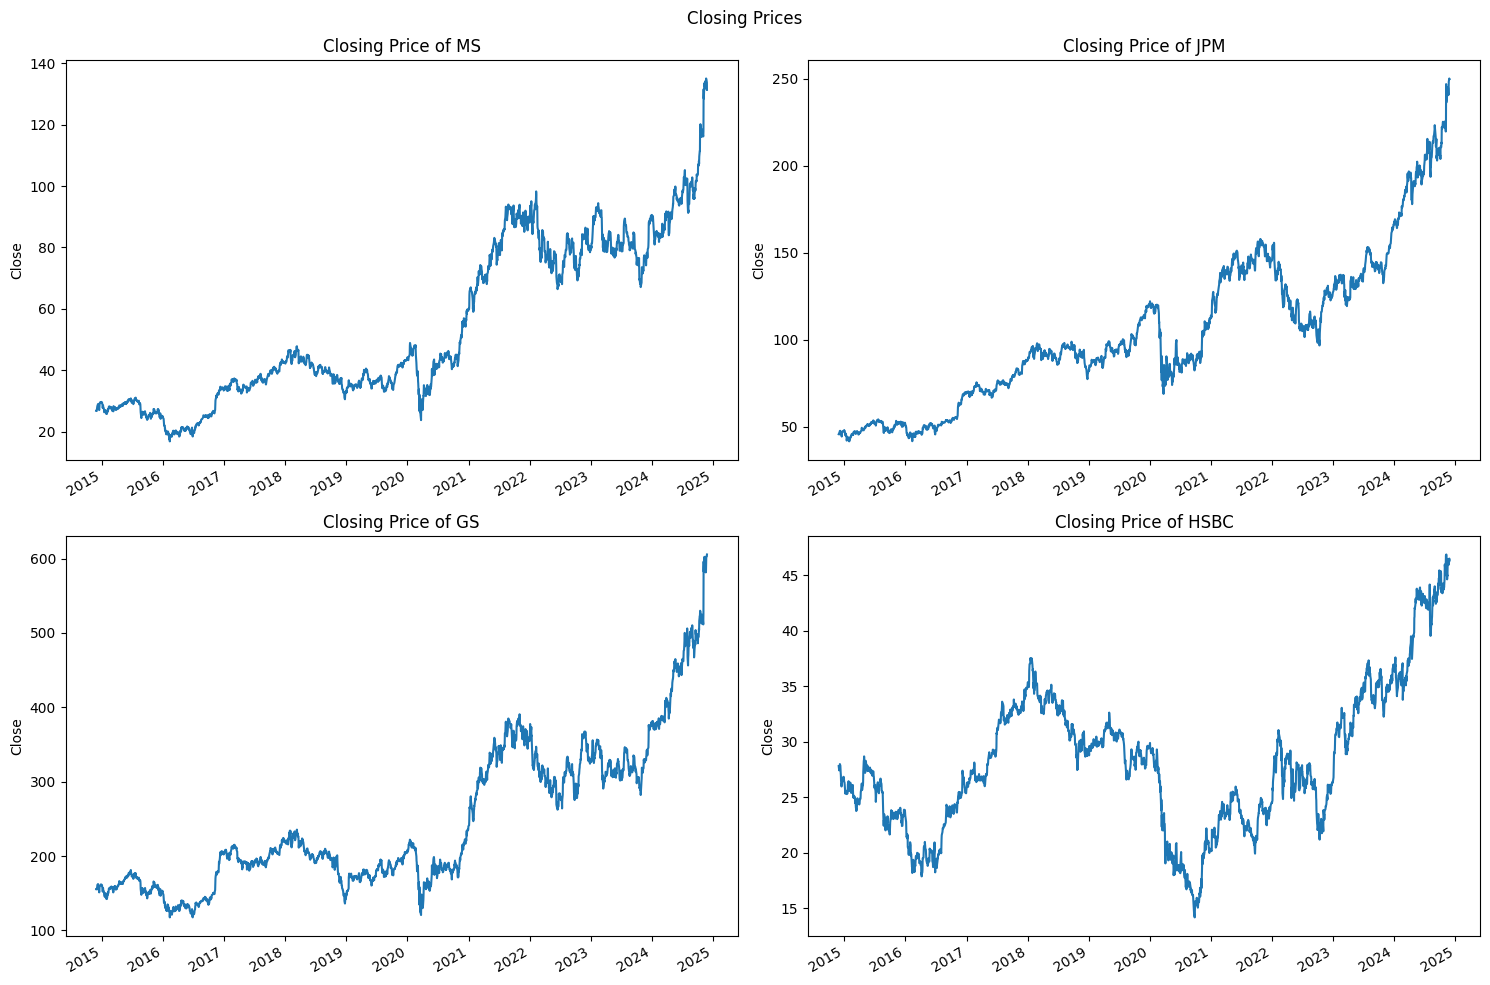

In [ ]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(stock_list,1):
    plt.subplot(2, 2, i)
    company['Close'].plot()
    plt.ylabel('Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {name_list[i-1]}")
plt.suptitle("Closing Prices")
plt.tight_layout()

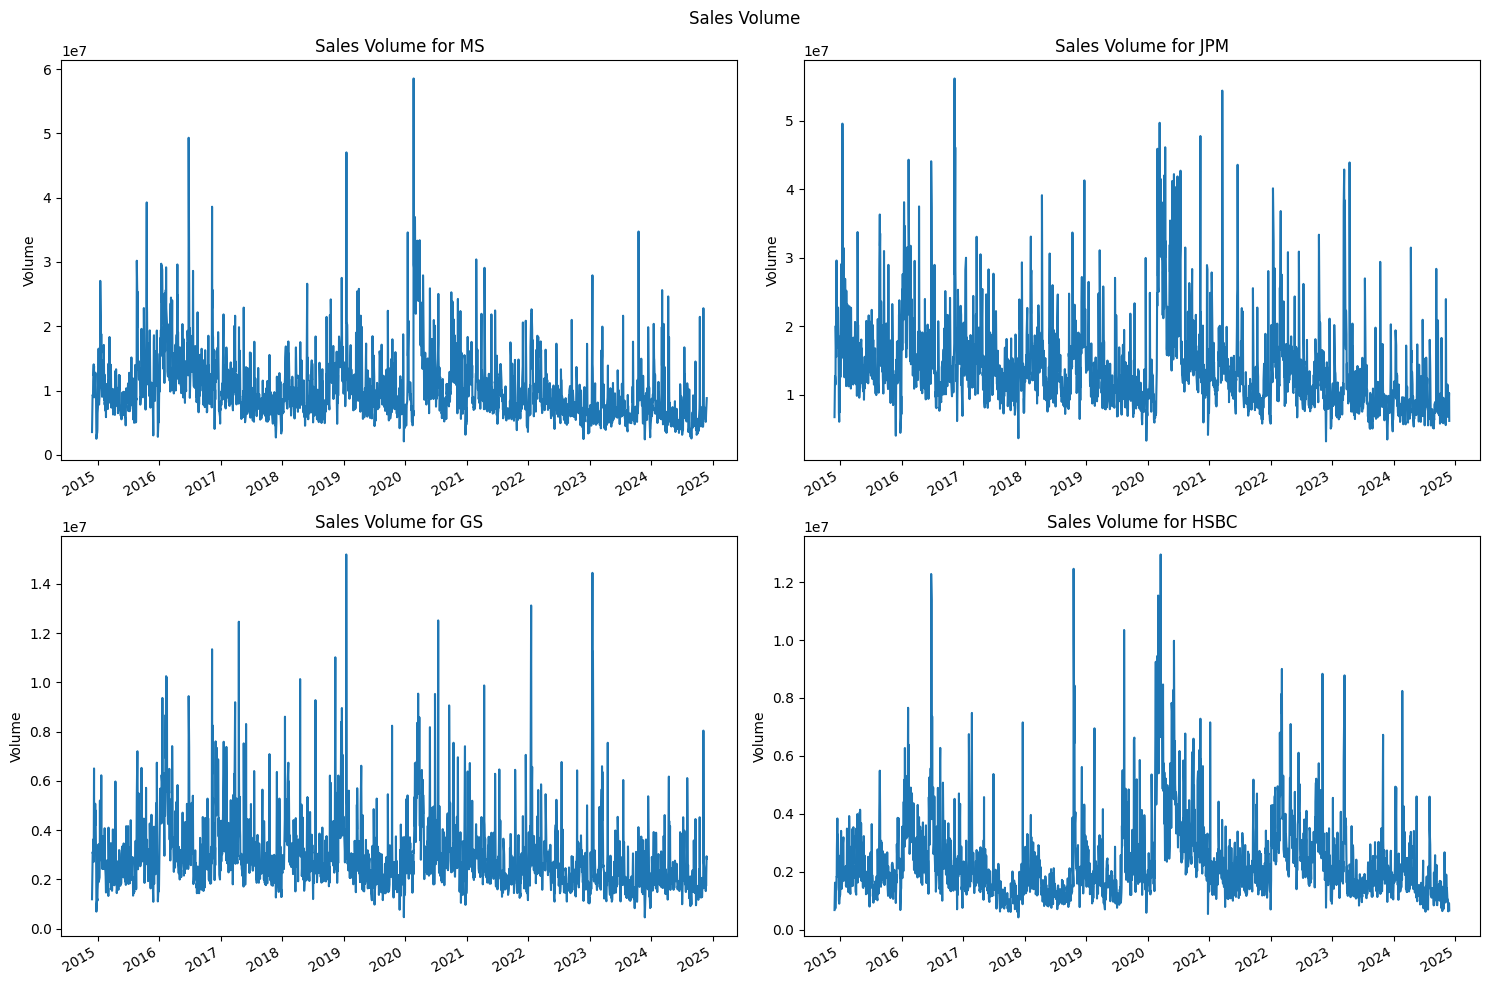

In [ ]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(stock_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {name_list[i - 1]}")

plt.suptitle('Sales Volume')
plt.tight_layout()

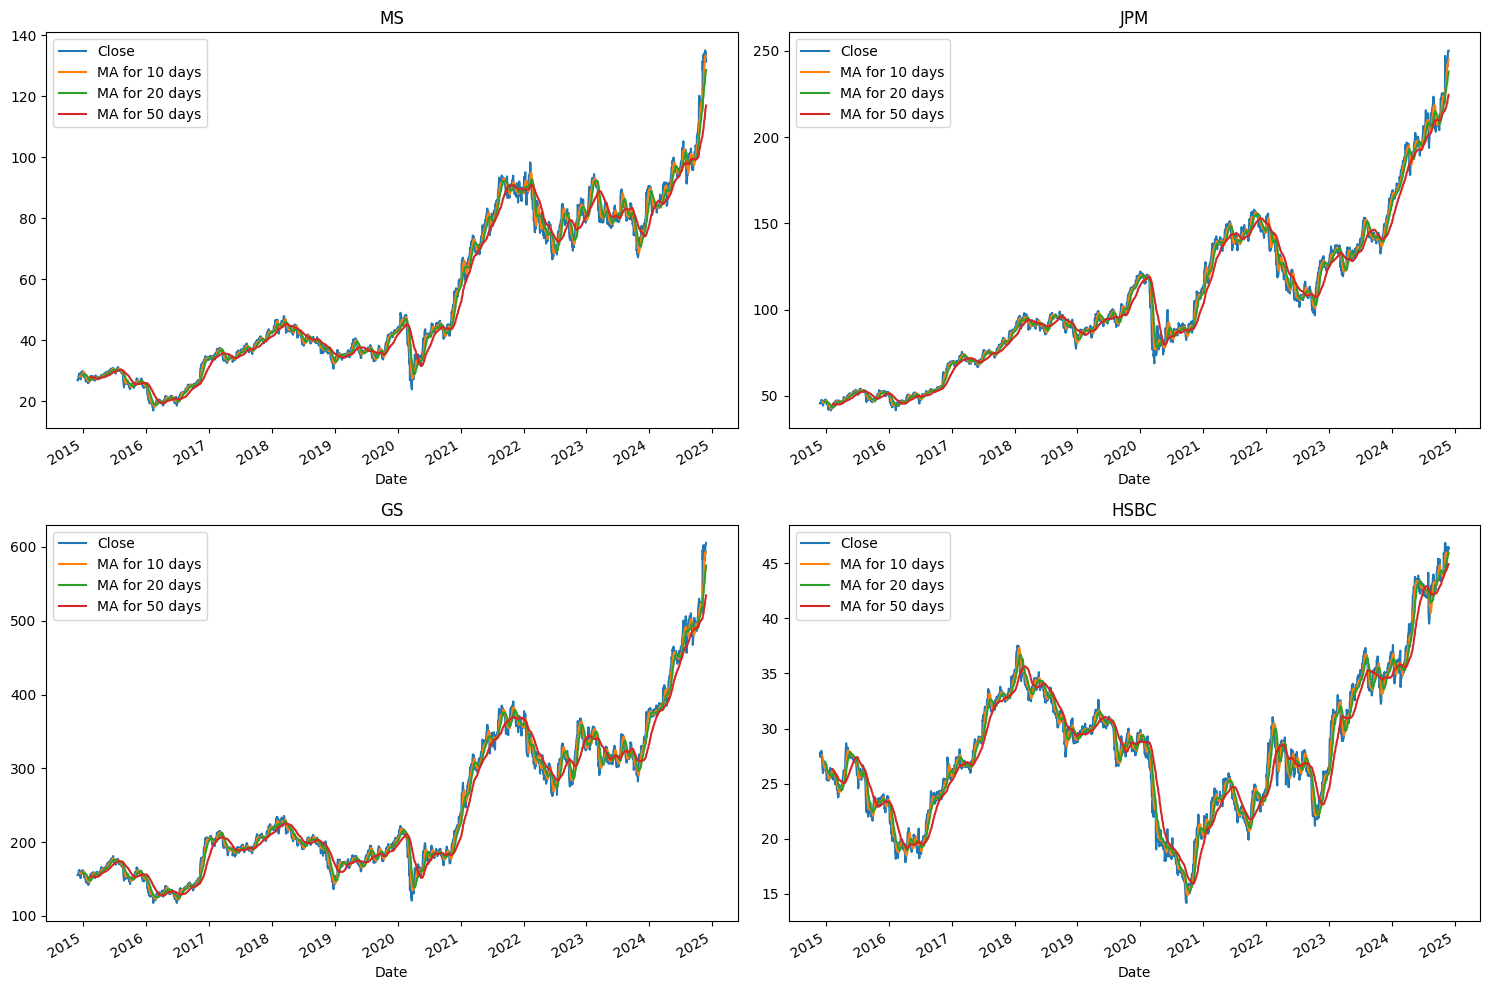

In [ ]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in stock_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Close'].rolling(ma).mean()


fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

ms_hist[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('MS')

jpm_hist[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('JPM')

gs_hist[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('GS')

hsbc_hist[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('HSBC')

fig.tight_layout()

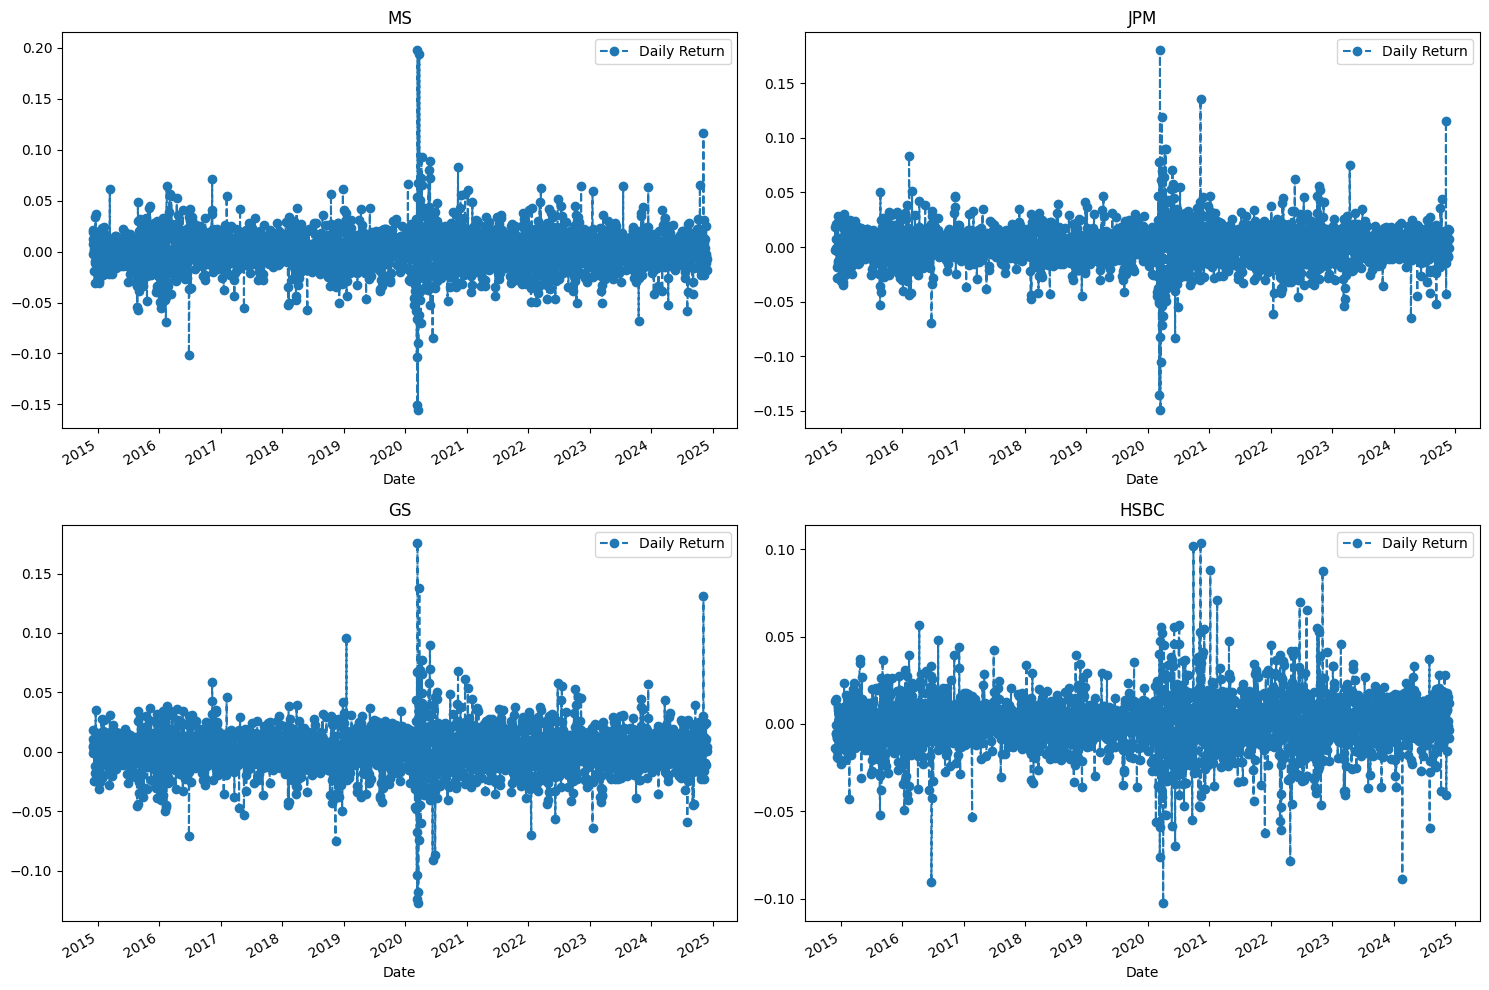

In [ ]:
# We'll use pct_change to find the percent change for each day
for company in stock_list:
    company['Daily Return'] = company['Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

ms_hist['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('MS')

jpm_hist['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('JPM')

gs_hist['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('GS')

hsbc_hist['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('HSBC')

fig.tight_layout()

In [ ]:
ms_hist['Daily Return']

,Daily Return
Date,
2014-11-28 00:00:00-05:00,NaN
2014-12-01 00:00:00-05:00,-0.002274
2014-12-02 00:00:00-05:00,0.019088
2014-12-03 00:00:00-05:00,0.020967
2014-12-04 00:00:00-05:00,0.007393
...,...
2024-11-20 00:00:00-05:00,-0.004159
2024-11-21 00:00:00-05:00,0.025059
2024-11-22 00:00:00-05:00,-0.002222


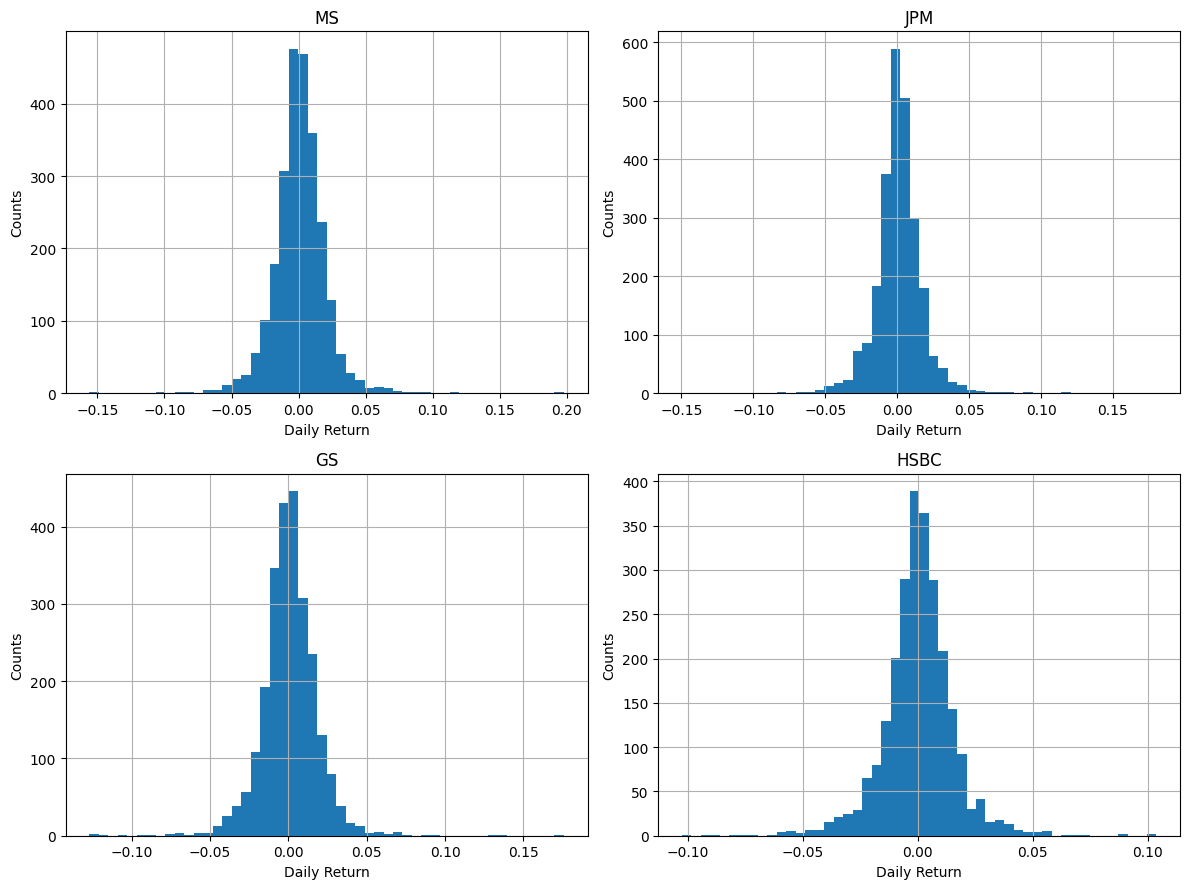

In [ ]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(stock_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{name_list[i - 1]}')

plt.tight_layout()

In [ ]:
ms_hist.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'MA for 10 days', 'MA for 20 days', 'MA for 50 days', 'Daily Return'],
      dtype='object')

In [ ]:
dataset = ms_hist[['Close','Open','High', 'Low']]
model_data = pd.DataFrame(dataset)

model_data = model_data.values

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
model_data = scaler.fit_transform(model_data)

In [ ]:
timestep = 60

In [ ]:
train_size = int(len(model_data)*.8)
test_size = len(ms_hist)-train_size

print("Train Size :",train_size,"Test Size :",test_size)

Train Size : 2012 Test Size : 504


In [ ]:
train_data = model_data[:train_size,:]
test_data = model_data[train_size-timestep:,:]

In [ ]:
train_data.shape, test_data.shape

((2012, 4), (564, 4))

In [ ]:
sequence_length = 60

In [ ]:
x_train = []
y_train = []

for i in range(len(train_data)-timestep):
    x_train.append(train_data[i:i + sequence_length])
    y_train.append(train_data[i + sequence_length, 0])


x_train,y_train = np.array(x_train),np.array(y_train)

In [ ]:
y_train.shape

(1952,)

In [ ]:
x_test = []
y_test = []

for i in range(len(test_data)-timestep):
    x_test.append(test_data[i:i + sequence_length])
    y_test.append(test_data[i + sequence_length, 0])
x_test, y_test = np.array(x_test), np.array(y_test)

In [ ]:
y_train

array([-1.01448352, -1.02237067, -1.00922607, ...,  1.09249134,
        1.11342321,  1.12264707])

In [ ]:
x_test.shape,y_test.shape

((504, 60, 4), (504,))

In [ ]:
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import LSTM,Dense,Dropout,BatchNormalization,GRU
from tensorflow.keras import layers

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
model = Sequential([
    GRU(150, return_sequences= False, input_shape= (x_train.shape[1], 4)),
    Dropout(0.4),
    Dense(64),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer= 'adam', loss= 'mse' , metrics= ['mean_absolute_error','r2_score','root_mean_squared_error'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_2 (GRU)                          │ (None, 150)                 │          70,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 150)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │           9,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,929 (312.22 KB)

 Trainable params: 79,929 (312.22 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
callbacks = [EarlyStopping(monitor= 'loss', patience= 10 , restore_best_weights= True)]
history = model.fit(x_train, y_train, epochs= 25, batch_size= 16 , callbacks= callbacks )

Epoch 1/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - loss: 0.1292 - mean_absolute_error: 0.2408 - r2_score: 0.8031 - root_mean_squared_error: 0.3337
Epoch 2/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 7s 57ms/step - loss: 0.0184 - mean_absolute_error: 0.1013 - r2_score: 0.9720 - root_mean_squared_error: 0.1351
Epoch 3/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - loss: 0.0142 - mean_absolute_error: 0.0887 - r2_score: 0.9781 - root_mean_squared_error: 0.1192
Epoch 4/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - loss: 0.0122 - mean_absolute_error: 0.0813 - r2_score: 0.9803 - root_mean_squared_error: 0.1104
Epoch 5/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 7s 57ms/step - loss: 0.0110 - mean_absolute_error: 0.0785 - r2_score: 0.9828 - root_mean_squared_error: 0.1049
Epoch 6/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - loss: 0.0106 - mean_absolute_error: 0.0768 - r2_score: 0.9833 - root_mean_squared_error: 0.1030
Epoch 7/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - loss: 0.0109 - mean_absolute_error: 0.

In [ ]:
predicted_prices = model.predict(x_test)

predicted_prices = predicted_prices.reshape(-1, 1)

num_samples = predicted_prices.shape[0]
dummy_features = np.zeros((num_samples, 3))
predicted_full = np.concatenate((dummy_features, predicted_prices), axis=1)
predicted_prices_inversed = scaler.inverse_transform(predicted_full)[:, -1]

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step


In [ ]:
original_prices = y_test.reshape(-1, 1)

num_samples = original_prices.shape[0]
dummy_features = np.zeros((num_samples, 3))
original_full = np.concatenate((dummy_features, original_prices), axis=1)
original_prices_inversed = scaler.inverse_transform(original_full)[:, -1]

RMSE = np.sqrt(np.mean( original_prices_inversed - predicted_prices_inversed )**2).round(2)
print(f"Root mean squared error:{RMSE}")

Root mean squared error:1.41


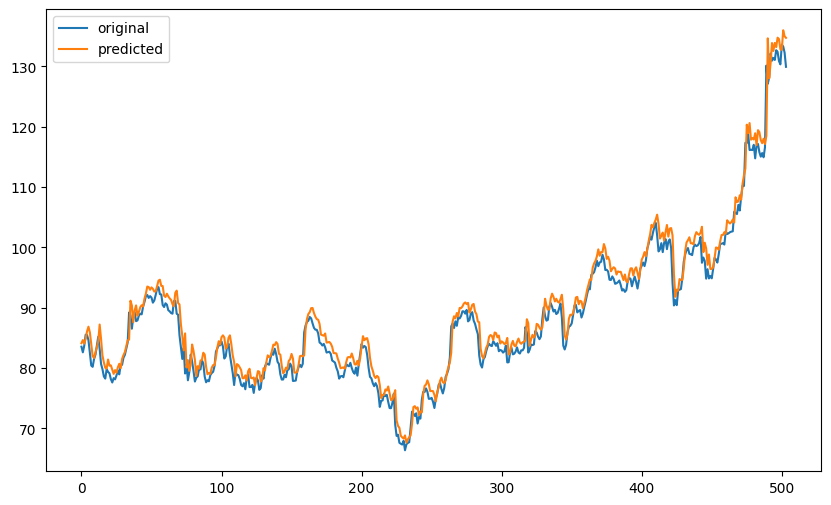

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(original_prices_inversed, label = 'original')
plt.plot(predicted_prices_inversed, label = 'predicted')
plt.legend()
plt.show()

In [ ]:
Model_lstm = Sequential()
Model_lstm.add(LSTM(units = 100, return_sequences = True, input_shape = (x_train.shape[1],4)))
Model_lstm.add(Dropout(0.2))
Model_lstm.add(LSTM(units = 100, return_sequences = True))
Model_lstm.add(Dropout(0.2))
Model_lstm.add(LSTM(units = 100, return_sequences = True))
Model_lstm.add(Dropout(0.2))
Model_lstm.add(layers.LSTM(units = 100, return_sequences = False))
Model_lstm.add(layers.Dropout(rate = 0.2))
Model_lstm.add(layers.Dense(units = 25))
Model_lstm.add(layers.Dense(units = 1))
Model_lstm.add(Dense(units = 1))
Model_lstm.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                       │ (None, 60, 100)             │          42,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 60, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_13 (LSTM)                       │ (None, 60, 100)             │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 60, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_14 (LSTM)                       │ (None, 60, 100)             │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 60, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_15 (LSTM)                       │ (None, 100)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 25)                  │           2,525 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 1)                   │              26 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 285,753 (1.09 MB)

 Trainable params: 285,753 (1.09 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
Model_lstm.compile(optimizer= 'adam', loss = 'mean_squared_error', metrics =['mean_absolute_error','r2_score','root_mean_squared_error'])

In [ ]:
history_lstm =  Model_lstm.fit(x_train, y_train, epochs = 15, batch_size = 16)

Epoch 1/15
122/122 ━━━━━━━━━━━━━━━━━━━━ 26s 151ms/step - loss: 0.0806 - mean_absolute_error: 0.1897 - r2_score: 0.8815 - root_mean_squared_error: 0.2646
Epoch 2/15
122/122 ━━━━━━━━━━━━━━━━━━━━ 21s 153ms/step - loss: 0.0211 - mean_absolute_error: 0.1067 - r2_score: 0.9665 - root_mean_squared_error: 0.1446
Epoch 3/15
122/122 ━━━━━━━━━━━━━━━━━━━━ 20s 152ms/step - loss: 0.0166 - mean_absolute_error: 0.0957 - r2_score: 0.9725 - root_mean_squared_error: 0.1290
Epoch 4/15
122/122 ━━━━━━━━━━━━━━━━━━━━ 20s 148ms/step - loss: 0.0145 - mean_absolute_error: 0.0903 - r2_score: 0.9779 - root_mean_squared_error: 0.1205
Epoch 5/15
122/122 ━━━━━━━━━━━━━━━━━━━━ 22s 160ms/step - loss: 0.0157 - mean_absolute_error: 0.0935 - r2_score: 0.9766 - root_mean_squared_error: 0.1248
Epoch 6/15
122/122 ━━━━━━━━━━━━━━━━━━━━ 18s 148ms/step - loss: 0.0125 - mean_absolute_error: 0.0858 - r2_score: 0.9802 - root_mean_squared_error: 0.1116
Epoch 7/15
122/122 ━━━━━━━━━━━━━━━━━━━━ 21s 149ms/step - loss: 0.0145 - mean_absol

In [ ]:
predicted_prices = Model_lstm.predict(x_test)

predicted_prices = predicted_prices.reshape(-1, 1)

num_samples = predicted_prices.shape[0]
dummy_features = np.zeros((num_samples, 3))
predicted_full = np.concatenate((dummy_features, predicted_prices), axis=1)
predicted_prices_inversed_lstm = scaler.inverse_transform(predicted_full)[:, -1]

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 136ms/step


In [ ]:
RMSE = np.sqrt(np.mean( original_prices_inversed - predicted_prices_inversed_lstm )**2).round(2)
print(f"Root mean squared error:{RMSE}")

Root mean squared error:3.19


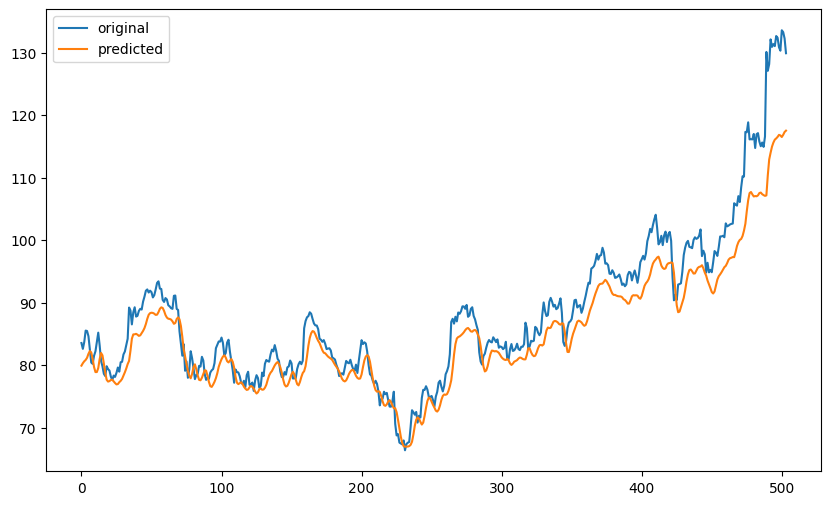

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(original_prices_inversed, label = 'original')
plt.plot(predicted_prices_inversed_lstm, label = 'predicted')
plt.legend()
plt.show()

In [ ]:
x_train = train_data[:,1:]
y_train = train_data[:,0]

In [ ]:
x_test = test_data[:,1:]
y_test = test_data[:,0]

In [ ]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [ ]:
lm.score(x_train,y_train)

0.999731164281263

In [ ]:
predictions_ln = lm.predict(x_test)

In [ ]:
predicted_prices = predictions_ln.reshape(-1, 1)

num_samples = predicted_prices.shape[0]
dummy_features = np.zeros((num_samples, 3))
predicted_full = np.concatenate((dummy_features, predicted_prices), axis=1)
predicted_prices_inversed_ln = scaler.inverse_transform(predicted_full)[:, -1]

In [ ]:
original_prices = y_test.reshape(-1, 1)

num_samples = original_prices.shape[0]
dummy_features = np.zeros((num_samples, 3))
original_full = np.concatenate((dummy_features, original_prices), axis=1)
original_prices_inversed = scaler.inverse_transform(original_full)[:, -1]

In [ ]:
from sklearn.metrics import r2_score
r2_score(original_prices_inversed, predicted_prices_inversed_ln)

0.9985294869966065

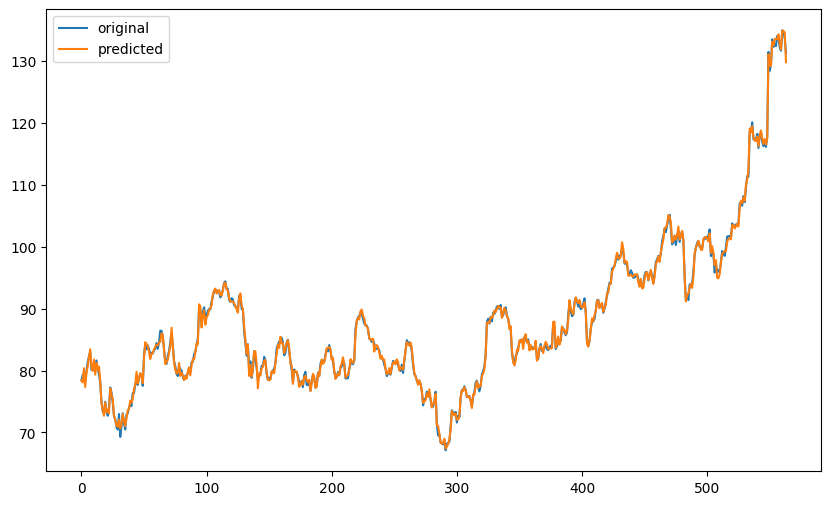

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(original_prices_inversed, label = 'original')
plt.plot(predicted_prices_inversed_ln, label = 'predicted')
plt.legend()
plt.show()